# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Example-R-code-to-read-in-ultrasound-data-and-perform-some-basic-plotting" data-toc-modified-id="Example-R-code-to-read-in-ultrasound-data-and-perform-some-basic-plotting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example R code to read in ultrasound data and perform some basic plotting</a></div><div class="lev1 toc-item"><a href="#Spaghetti-plots" data-toc-modified-id="Spaghetti-plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Spaghetti plots</a></div><div class="lev1 toc-item"><a href="#Difference-birth-and-estimated-weight" data-toc-modified-id="Difference-birth-and-estimated-weight-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Difference birth and estimated weight</a></div>


#  Example R code to read in ultrasound data and perform some basic plotting

Optionally, install and load the 'hbgd' package to access tools for calculating Z-scores and for fitting growth trajectories

In [2]:
#install.packages("hbgd", repos = c(
# CRAN    = "http://cran.rstudio.org",
# tessera = "http://packages.tessera.io")
#)

library(hbgd)
library(Hmisc)
library(tidyverse)

STUDYID,SUBJID,SEXN,SEX,GAGEBRTH,BIRTHWT,BIRTHLEN,BIRTHHC,DELIVERY,PARITY,⋯,BPDAZ,FLAZ,BHC_Z,BLEN_Z,BWT_Z,BWT_40,BLEN_40,BHC_40,LOG10.FWT.GM,Study
1,1002,2,Female,276,3540,50.3,NA,Category 2.0,1,⋯,-0.2376447,2.142646,NA,0.8916001,0.8604704,3.614882,50.61003,NA,3.486183,Study 1
1,1002,2,Female,276,3540,50.3,NA,Category 2.0,1,⋯,NA,NA,NA,0.8916001,0.8604704,3.614882,50.61003,NA,NA,Study 1
1,1002,2,Female,276,3540,50.3,NA,Category 2.0,1,⋯,NA,NA,NA,0.8916001,0.8604704,3.614882,50.61003,NA,NA,Study 1
1,1003,1,Male,280,3100,50.3,NA,Category 2.0,1,⋯,-0.4535162,1.616571,NA,0.2352980,-0.7255638,3.100000,50.30000,NA,3.233630,Study 1
1,1003,1,Male,280,3100,50.3,NA,Category 2.0,1,⋯,-0.5539868,1.495569,NA,0.2352980,-0.7255638,3.100000,50.30000,NA,3.233630,Study 1
1,1003,1,Male,280,3100,50.3,NA,Category 2.0,1,⋯,-0.6071399,1.106900,NA,0.2352980,-0.7255638,3.100000,50.30000,NA,3.419602,Study 1


Total number of unique entries per column:


STUDYID,SUBJID,SEXN,SEX,GAGEBRTH,BIRTHWT,BIRTHLEN,BIRTHHC,DELIVERY,PARITY,⋯,BPDAZ,FLAZ,BHC_Z,BLEN_Z,BWT_Z,BWT_40,BLEN_40,BHC_40,LOG10.FWT.GM,Study
2,2525,2,2,61,229,92,40,7,8,⋯,2035,1656,193,717,1973,1932,710,185,6777,2


Distribution of measurements by subject

tot,1,3,4,5,6,7,8,9,10,11,12,13,14,15
nn,34,220,449,469,231,97,116,220,250,292,84,46,11,6


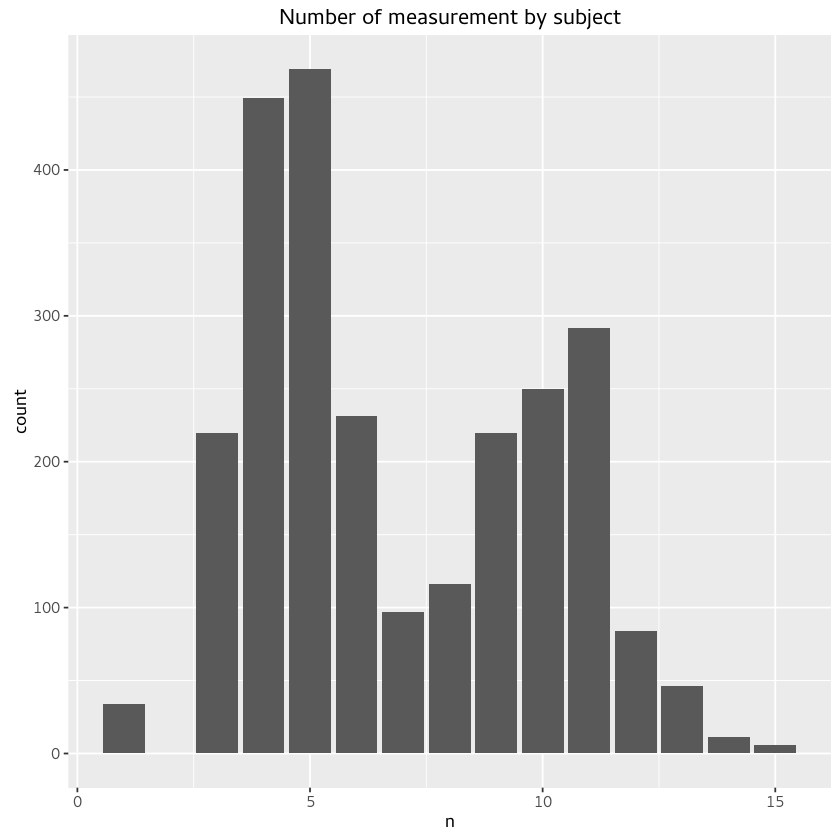

In [5]:
# Read training data  (45% of data was reserved for testing)
dat0 <- read.csv("../Ultrasound/training_ultrasound.csv")
#contents(dat0)

# Use Hadlock equation to estimate fetal weight from the 4 key ultrasound measurements
dat = dat0 %>%
    mutate(
        LOG10.FWT.GM = 1.3596 + 0.0064*HCIRCM + 0.0424*ABCIRCM + 0.174*FEMURCM + 0.00061*BPDCM*ABCIRCM - 0.00386*ABCIRCM*FEMURCM,
        WTKG = ifelse(AGEDAYS<1 ,(10^LOG10.FWT.GM)/1000 ,WTKG) ,
        Study = paste('Study', STUDYID)
        )

head(dat)
cat("Total number of unique entries per column:\n")
dat %>% summarise_each(funs(n_distinct(.)))

cat("Distribution of measurements by subject")
dat %>% count(SUBJID) %>% mutate(tot=n) %>% count(tot) %>% t
dat %>% count(SUBJID) %>% ggplot(aes(x=n)) + geom_bar() + ggtitle("Number of measurement by subject")


# Spaghetti plots

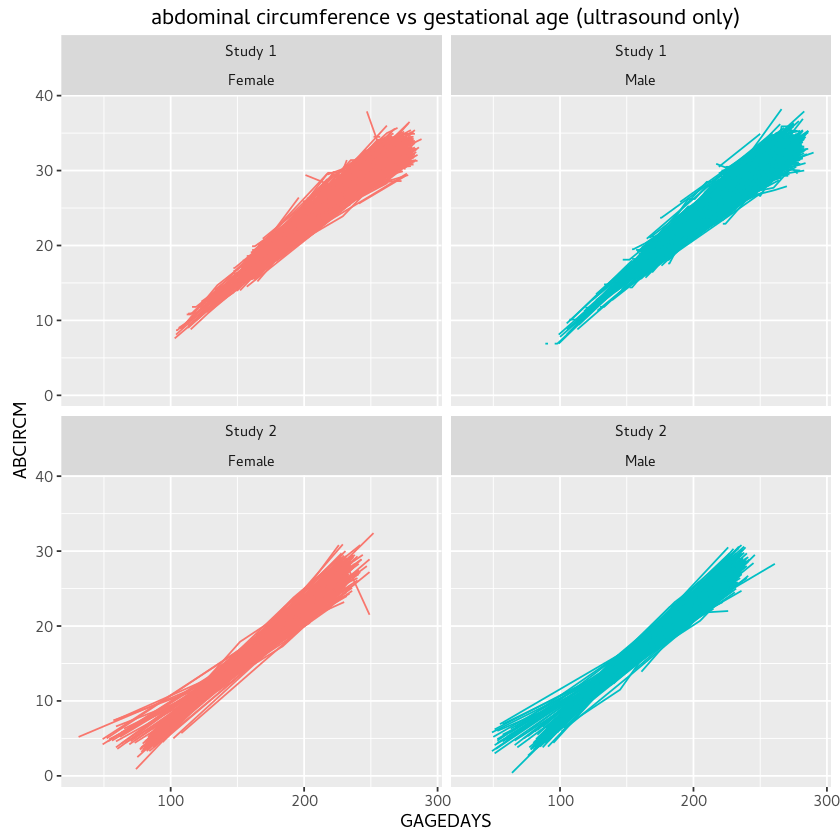

In [24]:
#-----------------------------------------------------------------------
# Spaghetti plots
#-----------------------------------------------------------------------

# Plot abdominal circumference vs gestational age (ultrasound only)
dati <- subset(dat ,!is.na(ABCIRCM))
gp <- ggplot(dati ,aes(x=GAGEDAYS ,y=ABCIRCM ,group=SUBJID ,color=SEX))
gp + geom_line() + facet_wrap(Study ~ SEX ,nrow=2) + 
    theme(legend.position="none") + 
    ggtitle("abdominal circumference vs gestational age (ultrasound only)")

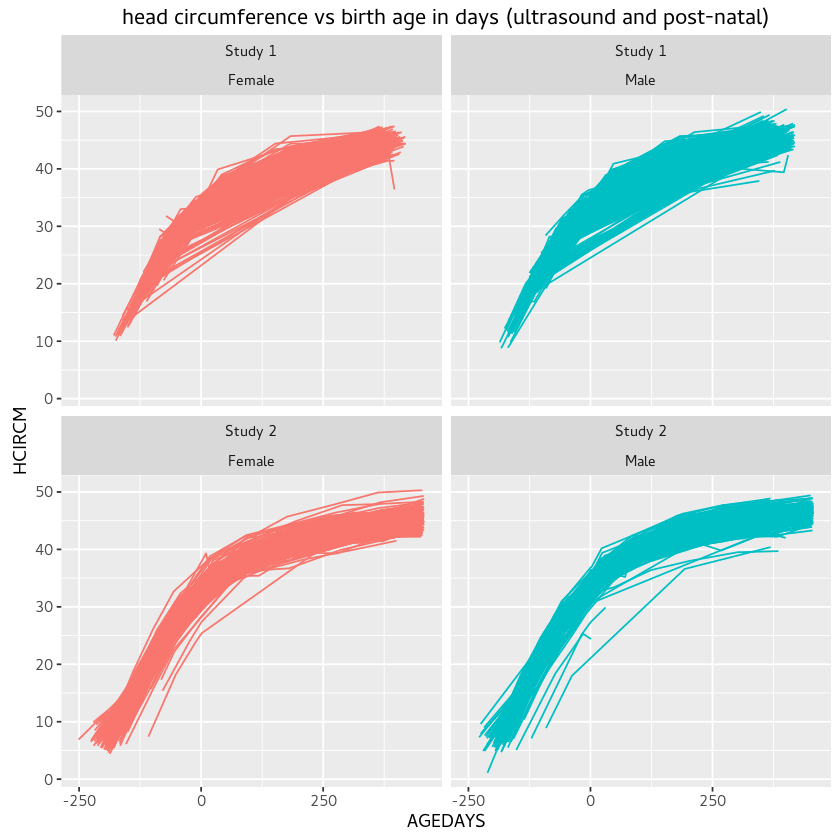

In [27]:
# Plot head circumference vs birth age in days (ultrasound and post-natal)
dati <- subset(dat ,!is.na(HCIRCM))
gp <- ggplot(dati ,aes(x=AGEDAYS ,y=HCIRCM ,group=SUBJID ,color=SEX))
gp + geom_line() + facet_wrap(Study ~ SEX ,nrow=2) + 
  theme(legend.position="none") +
    ggtitle("head circumference vs birth age in days (ultrasound and post-natal)")


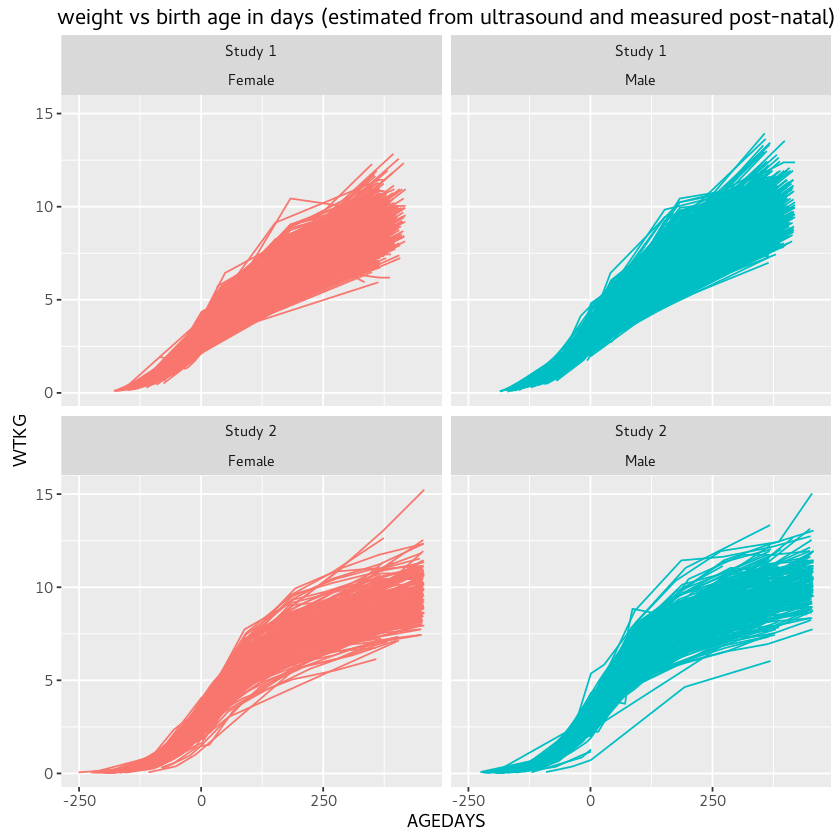

In [28]:
# Plot weight vs birth age in days (estimated from ultrasound and measured post-natal)
dati <- subset(dat ,!is.na(WTKG))
gp <- ggplot(dati ,aes(x=AGEDAYS ,y=WTKG ,group=SUBJID ,color=SEX))
gp + geom_line() + facet_wrap(Study ~ SEX ,nrow=2) + 
  theme(legend.position="none") +
  ggtitle("weight vs birth age in days (estimated from ultrasound and measured post-natal)")

In [45]:
#-----------------------------------------------------------------------
# Re-do the spaghetti plots as dot plots to see the visit schedule
#-----------------------------------------------------------------------

#dati <- subset(dat ,!is.na(ABCIRCM))
#gp <- ggplot(dati ,aes(x=GAGEDAYS ,y=ABCIRCM ,group=SUBJID ,color=SEX))
#gp + geom_point() + facet_wrap(Study ~ SEX ,nrow=2) + 
#  theme(legend.position="none")


#dati <- subset(dat ,!is.na(HCIRCM))
#gp <- ggplot(dati ,aes(x=AGEDAYS ,y=HCIRCM ,group=SUBJID ,color=SEX))
#gp + geom_point() + facet_wrap(Study ~ SEX ,nrow=2) + 
#  theme(legend.position="none")


#dati <- subset(dat ,!is.na(WTKG))
#gp <- ggplot(dati ,aes(x=AGEDAYS ,y=WTKG ,group=SUBJID ,color=SEX))
#gp + geom_point() + facet_wrap(Study ~ SEX ,nrow=2) + 
#  theme(legend.position="none")



# Difference birth and estimated weight

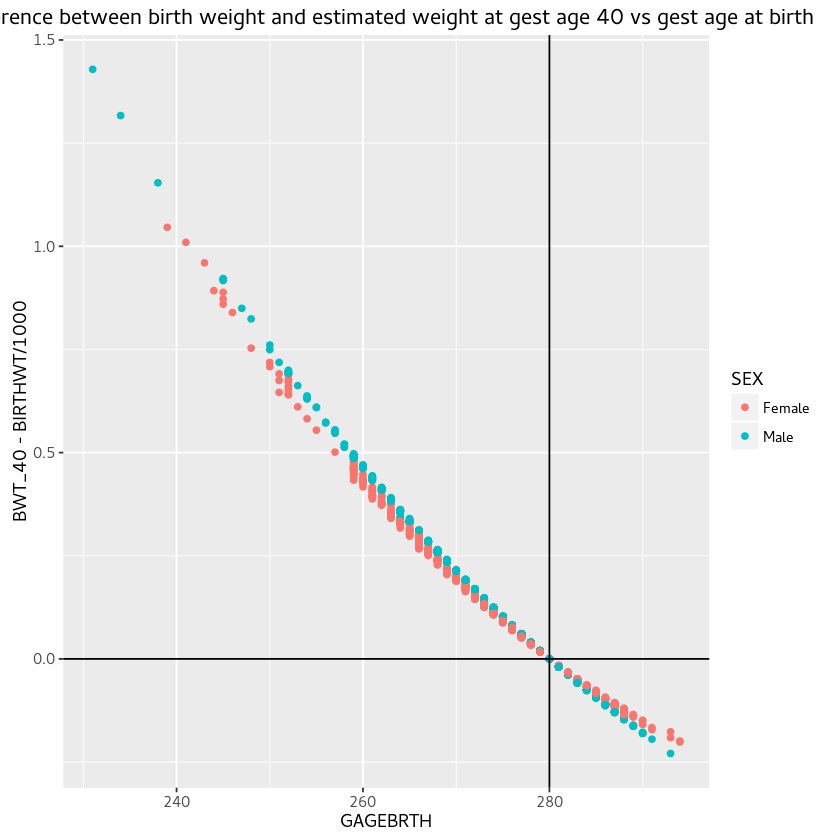

In [46]:
#-----------------------------------------------------------------------
# Plot the difference between birth weight and estimated weight at 
# gest age 40 vs gest age at birth
#-----------------------------------------------------------------------

dati <- unique(subset(dat ,!is.na(BWT_40) ,c(STUDYID,SUBJID,SEX,GAGEBRTH,BIRTHWT,BWT_40)))
gp <- ggplot(dati ,aes(x=GAGEBRTH ,y=BWT_40-BIRTHWT/1000 ,color=SEX))
gp + geom_point() + geom_hline(yintercept=0) + geom_vline(xintercept=280) + ggtitle("difference between birth weight and estimated weight at gest age 40 vs gest age at birth")

